In [1]:
# Importando Bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#XOR 

#Input
X_XOR = np.array([[0, 1],
              [1, 0],
              [1, 1],
              [0, 0]
             ])
#Output
Y_XOR = np.array([[1],
               [1],
               [0],
               [0]])

In [3]:
#AND 

#Input
X_AND = np.array([[0, 1],
                  [1, 0],
                  [1, 1],
                  [0, 0]
                  ])
#Output
Y_AND = np.array([[0],
                  [0],
                  [1],
                  [0]])

In [4]:
#OR 

#Input
X_OR = np.array([[0, 1],
                 [1, 0],
                 [1, 1],
                 [0, 0]
                ])
#Output
Y_OR = np.array([[1],
                 [1],
                 [1],
                 [0]])

In [5]:
LISTA_X = [X_XOR,X_AND, X_OR]
LISTA_Y = [Y_XOR, Y_AND, Y_OR]
NAMES = ['X_XOR', 'X_AND', 'X_OR']

LOGIC GATE: X_XOR
Iteração:0. Erro: 0.7166445614272869
Iteração:6000. Erro: 0.6924126606297669
Iteração:12000. Erro: 0.6149206528436855
Iteração:18000. Erro: 0.5123048434630938
Iteração:24000. Erro: 0.436061637023509
Iteração:30000. Erro: 0.3798372035521916
Iteração:36000. Erro: 0.3370453051427731
Iteração:42000. Erro: 0.3034422474023726
Iteração:48000. Erro: 0.2763477999855357
Iteração:54000. Erro: 0.2540191955118304
Porcentagem: 
[[0.94017184]
 [0.94017172]
 [0.09792897]
 [0.02494161]]
Previsão: 
[[1.]
 [1.]
 [0.]
 [0.]]
----------------------------------
LOGIC GATE: X_AND
Iteração:0. Erro: 0.8115978186326449
Iteração:6000. Erro: 0.30802446990050036
Iteração:12000. Erro: 0.24694942531710748
Iteração:18000. Erro: 0.22432179191257687
Iteração:24000. Erro: 0.21249930648357535
Iteração:30000. Erro: 0.2052094010291697
Iteração:36000. Erro: 0.20025317090528108
Iteração:42000. Erro: 0.19665871652951597
Iteração:48000. Erro: 0.19392928717323266
Iteração:54000. Erro: 0.19178418656467264
Porce

<Figure size 432x288 with 0 Axes>

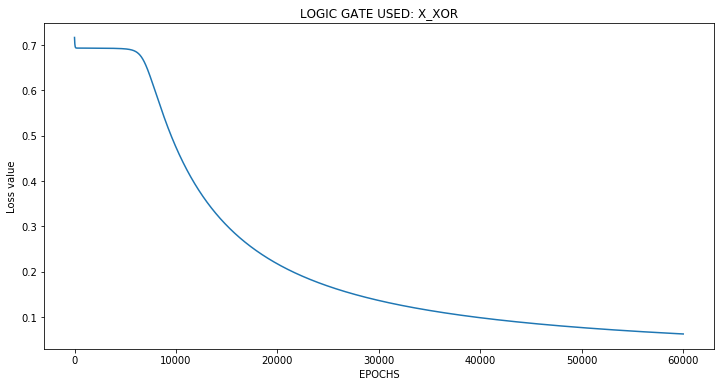

<Figure size 432x288 with 0 Axes>

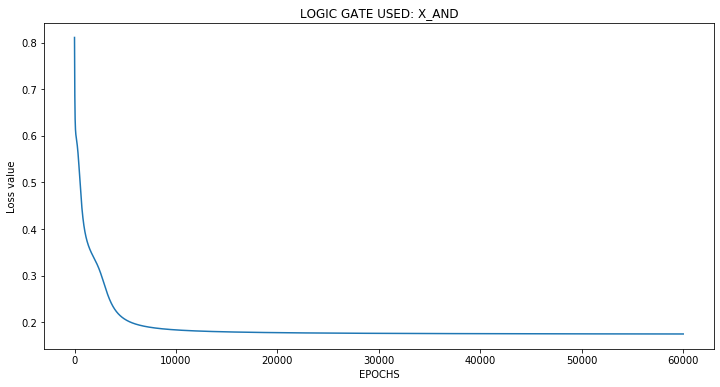

<Figure size 432x288 with 0 Axes>

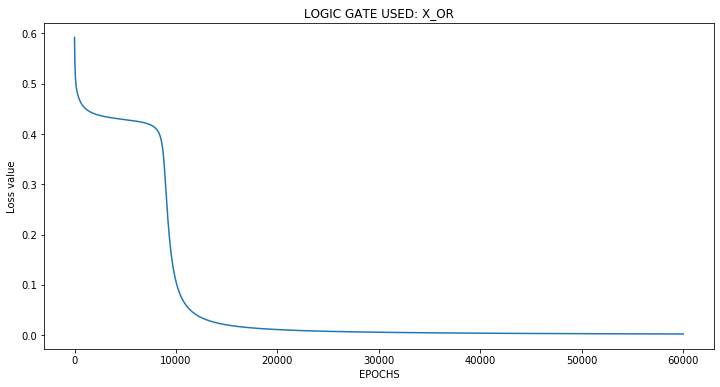

In [6]:
for X, Y, LOGIC_NAME in zip(LISTA_X, LISTA_Y, NAMES):
    print('LOGIC GATE: {}'.format(LOGIC_NAME))
    plt.figure()
    # Learning Rate
    lr = 0.085

    # Perda
    loss = []
    L = []

    # Iterações
    epochs = 60000

    # Total de Valores p/ Treino
    m = len(X)

    # Número de Inputs/Outputs
    n_inputs = 2 # Número de Inputs
    n_hidden = 2 # Número de Hidden Inputs
    n_outputs = 1 # Número de Outputs

    # Matrizes dos Pesos
    np.random.seed(2)
    W1 = np.random.rand(n_hidden,n_inputs)    # Matriz de peso para Camada Oculta
    W2 = np.random.rand(n_outputs,n_hidden)   # Matriz de peso para Output
    #Função de Ativação Sigmóide

    # Função Sigmóide
    def sigmoid(z):
        z= 1/(1+np.exp(-z))
        return z

    # Derivada da Função Sigmóide
    def dsig(z):
        return (sigmoid(z)*(1-sigmoid(z)))

    # Forward propagation
    def netforward(W1,W2,X):
        h = np.dot(W1,X.T)      # Hidden s/ Função Ativação 
        ha = sigmoid(h)         # Hidden 
        y = np.dot(W2,ha)       # Output s/ Função Ativação z2
        ya = sigmoid(y)         # Output a2
        return h,ha,y,ya

    # Backward propagation
    def backprop(m,W1,W2,h,ha,y,ya,Y):
        
        dy = ya-Y.T                          # dL/dy * dy/dya  
        dW2 = np.dot(dy,ha.T)/m              # dL/dy * dy/dya * dy/dW2 = dL/dW2
        dh = np.dot(W2.T,dy) * dsig(h)       # dL/dh * dh/dha
        dW1 = np.dot(dh,X)/m                 # dL/dh * dh/dha * dh/dW1 = dL/dW1  
        return dy,dW2,dh,dW1

    for i in range(epochs):
        
        #Forward
        h, ha, y, ya = netforward(W1,W2,X)
        
        #BackPropagation
        dy,dW2,dh,dW1 = backprop(m,W1,W2,h,ha,y,ya,Y)
        
        
        W1 -= lr*dW1
        W2 -= lr*dW2
            
        #Loss Function
        loss = (-(1/m)*np.sum(Y.T*np.log(ya)+(1-Y.T)*np.log(1-ya))).T
        L.append(loss)
        
        if i % 6000 == 0:
            print(f"Iteração:{i}. Erro: {np.mean(np.abs(L))}")
        
    # We plot losses to see how our network is doing
    plt.figure(figsize=(12,6))
    plt.title('LOGIC GATE USED: {}'.format(LOGIC_NAME))
    plt.xlabel("EPOCHS")
    plt.ylabel("Loss value")
    plt.plot(L)
    plt.savefig(LOGIC_NAME+'.png', dpi=300)

    print("Porcentagem: ")
    print(ya.T)
    print("Previsão: ")
    print(np.round(ya.T))
    print('----------------------------------')